<a href="https://colab.research.google.com/github/kjmobile/lb/blob/main/14_Neural_Network_3_Q.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Neural Net 3 - common techniques in neural net modeling  
- validation loss, drop out, save and load model, and call back

In [ ]:
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

tf.keras.utils.set_random_seed(42)
tf.config.experimental.enable_op_determinism()

## Loss curve

In [ ]:
#Import dataset, normalize the train set, and set aside validtaion set
from tensorflow import keras
from sklearn.model_selection import train_test_split

(train_input, train_target), (test_input, test_target) = \
    keras.datasets.fashion_mnist.load_data()

train_scaled = train_input / 255.0

train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size=0.2, random_state=42)

In [ ]:
# In this example, we create a simple function that consolidates the model design process, we've used in previous examples.
# if block indicats that if, and only if, a_layer is passesed as an argument, we add the layer before the output layer.
def model_fn(a_layer=None):
    model = keras.Sequential()
    model.add(keras.layers.Flatten(input_shape=(28, 28)))
    model.add(keras.layers.Dense(100, activation='relu'))
    if a_layer:
        model.add(a_layer)
    model.add(keras.layers.Dense(10, activation='softmax'))
    return model

In [ ]:
model = model_fn()

model.summary()

Model: "sequential_70"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_70 (Flatten)        (None, 784)               0         
                                                                 
 dense_140 (Dense)           (None, 100)               78500     
                                                                 
 dense_141 (Dense)           (None, 10)                1010      
                                                                 
Total params: 79510 (310.59 KB)
Trainable params: 79510 (310.59 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:

model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')
model.fit(train_scaled, train_target, epochs=5, verbose=1)

#In addition to the model fitting sequences, model.fit() also returns an History object as <keras.src.callbacks.History at 0x7e7540258160>

Epoch 1/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.5311 - accuracy: 0.8112
Epoch 2/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3908 - accuracy: 0.8588
Epoch 3/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3542 - accuracy: 0.8710
Epoch 4/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3304 - accuracy: 0.8809
Epoch 5/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3145 - accuracy: 0.8871


In [ ]:
# save the returned object as history
history = model.fit(train_scaled, train_target, epochs=5, verbose=0)
# vervbose =0 suppresses printing the training process

In [ ]:
# # we can find the loss and accuracy history in the form of a dictionary
history.history

{'loss': [0.30325162410736084,
  0.29291102290153503,
  0.2844351828098297,
  0.2763077914714813,
  0.2693380117416382],
 'accuracy': [0.8918333053588867,
  0.8944791555404663,
  0.8990416526794434,
  0.9019374847412109,
  0.9042083621025085]}

Text(0, 0.5, 'loss')

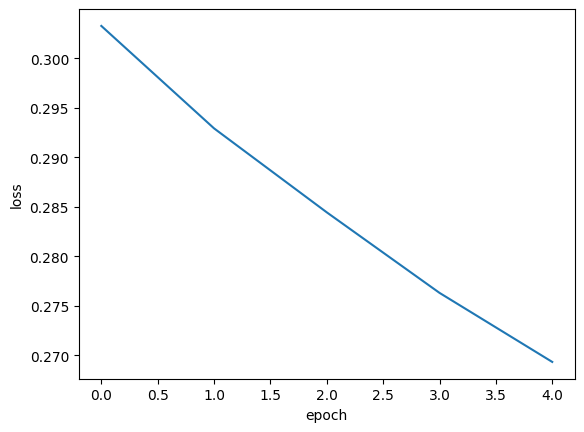

In [ ]:
# plot loss history : note that the nerual net optimizes for 'loss'  not 'accuracy'
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')

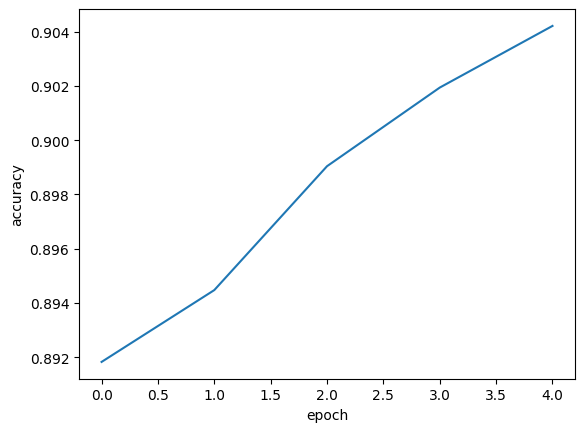

In [ ]:
#plot epoch history
plt.plot(history.history['accuracy'])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

In [ ]:
# increase the epochs to 20
model_1 = model_fn()
model_1.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')
history_1 = model_1.fit(train_scaled, train_target, epochs=20, verbose=0)

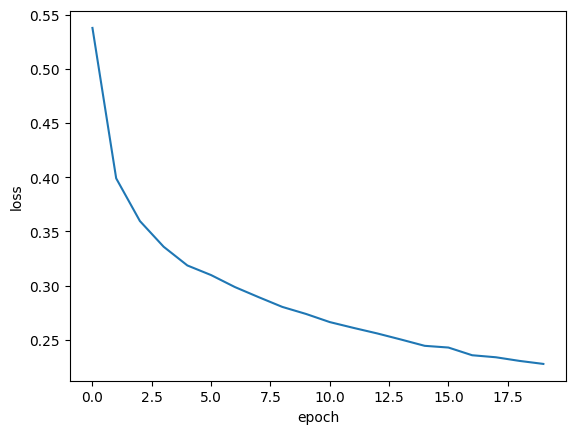

In [ ]:
plt.plot(history_1.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

## validation loss

In [ ]:
model_2 = model_fn()
model_2.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')

history_2 = model_2.fit(train_scaled, train_target, epochs=20, verbose=1,
                        validation_data=(val_scaled, val_target))
# To compute the validation score, validation_data parameter is added in fit() function .

Epoch 1/20
1500/1500 [==============================] - 7s 4ms/step - loss: 0.5350 - accuracy: 0.8104 - val_loss: 0.4376 - val_accuracy: 0.8449
Epoch 2/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3941 - accuracy: 0.8579 - val_loss: 0.4394 - val_accuracy: 0.8438
Epoch 3/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3561 - accuracy: 0.8728 - val_loss: 0.3660 - val_accuracy: 0.8677
Epoch 4/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3334 - accuracy: 0.8822 - val_loss: 0.3624 - val_accuracy: 0.8716
Epoch 5/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3176 - accuracy: 0.8850 - val_loss: 0.3566 - val_accuracy: 0.8742
Epoch 6/20
1500/1500 [==============================] - 5s 4ms/step - loss: 0.3078 - accuracy: 0.8921 - val_loss: 0.3757 - val_accuracy: 0.8744
Epoch 7/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2971 - accuracy: 0.8923 - val_loss: 0.3644 - val_accuracy:

In [ ]:
print(history_2.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


In [ ]:
min(history_2.history['val_loss'])

0.35546398162841797

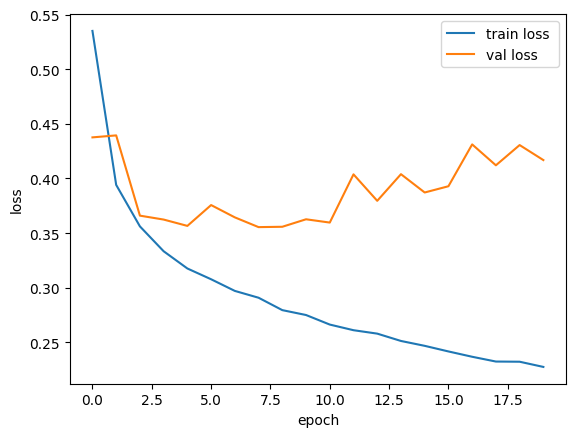

In [ ]:
plt.plot(history_2.history['loss'])
plt.plot(history_2.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train loss ', 'val loss'])
plt.show()

# while train loss continue to decrease, the validation loss stop decreasing after 0.35 level, leading to an over fitting.
# As one of the ways to prevent the overfit, we may change the default optimizer(RMSprop) to Adam optimizer, which uses adaptive learning rate

In [ ]:
# let's compile the same model but replacing the default optimizer(RMSprop) with 'adam'
model_3 = model_fn()
model_3.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
              metrics='accuracy')

history_3 = model_3.fit(train_scaled, train_target, epochs=20, verbose=0,
                    validation_data=(val_scaled, val_target))
# Now, the val_loss goes down  (lower than the model_2)

In [ ]:
min(history_3.history['val_loss'])

0.3167676031589508

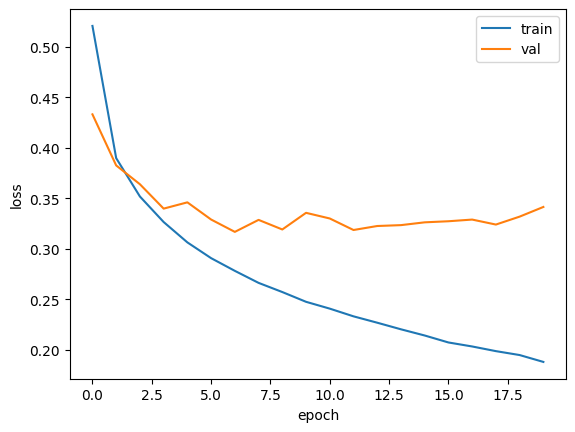

In [ ]:
plt.plot(history_3.history['loss'])
plt.plot(history_3.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

## Dropout (J. Hinton 2017)
- One of the regularization techniques that work well in neural net
- By randomly dropping neurons, dropout forces the model to become more robust, as it cannot rely on the presence of any specific neuron
- By randomly dropping neurons, each training step uses a different subset of neurons, akin to training a different model (aka, ensemble effect)

In [ ]:
# Now we add anothe layer (a dropout layer) to the prevous model
# The default is 0.5 (i.e., randomly dropping out 50% of the nodes)
model_4 = model_fn(keras.layers.Dropout(0.3))
model_4.summary()

Model: "sequential_74"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_74 (Flatten)        (None, 784)               0         
                                                                 
 dense_148 (Dense)           (None, 100)               78500     
                                                                 
 dropout_48 (Dropout)        (None, 100)               0         
                                                                 
 dense_149 (Dense)           (None, 10)                1010      
                                                                 
Total params: 79510 (310.59 KB)
Trainable params: 79510 (310.59 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
#
model_4.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')

history_4 = model_4.fit(train_scaled, train_target, epochs=20, verbose=1,
                    validation_data=(val_scaled, val_target))

Epoch 1/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.5896 - accuracy: 0.7922 - val_loss: 0.4265 - val_accuracy: 0.8468
Epoch 2/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.4385 - accuracy: 0.8424 - val_loss: 0.3762 - val_accuracy: 0.8623
Epoch 3/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.4022 - accuracy: 0.8539 - val_loss: 0.3665 - val_accuracy: 0.8654
Epoch 4/20
1500/1500 [==============================] - 5s 4ms/step - loss: 0.3793 - accuracy: 0.8622 - val_loss: 0.3533 - val_accuracy: 0.8718
Epoch 5/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3634 - accuracy: 0.8664 - val_loss: 0.3402 - val_accuracy: 0.8747
Epoch 6/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3507 - accuracy: 0.8699 - val_loss: 0.3316 - val_accuracy: 0.8793
Epoch 7/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3427 - accuracy: 0.8737 - val_loss: 0.3337 - val_accuracy:

In [ ]:
min(history_4.history['val_loss'])

0.31786370277404785

In [ ]:
np.argmin(history_4.history['val_loss'])

18

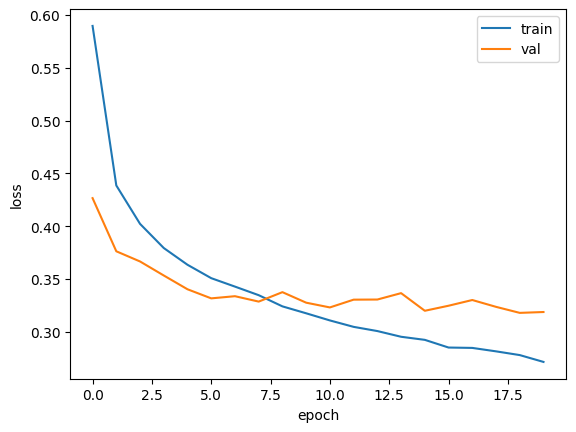

In [ ]:
plt.plot(history_4.history['loss'])
plt.plot(history_4.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()
# Now the val_loss continues to go down to 0.317(lower than Model_3's 0.318), overfit has been substantially decreased.
# The model perfomance was at its best at 18th epoch

## Saving and loading the fitted model

In [ ]:
# fix the epoch to 13 and rerun the model
model_5 = model_fn(keras.layers.Dropout(0.3))
model_5.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
              metrics='accuracy')

history_5 = model_5.fit(train_scaled, train_target, epochs=18, verbose=0,
                    validation_data=(val_scaled, val_target))

In [ ]:
model_5.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 2ms/step - loss: 0.3204 - accuracy: 0.8800


[0.32040876150131226, 0.8799999952316284]

In [ ]:
model_5.save_weights('model_5_weights.h5') # h5 is an extension for HDF5 format(Hierarchical Data Format version 5; goog for saving large hierachical dataset)

In [ ]:
model_5.save('model_5_whole.h5')

In [ ]:
#!ls -al *.h5  # a linux command to : 'list (ls) all, detailed(-al) everthing (*) witht the extention .h5')

In [ ]:
# Loading the saved model_5 as a new model_6
model_6 = model_fn(keras.layers.Dropout(0.3))
model_6.load_weights('model_5_weights.h5')


In [ ]:
#alternatively we can simply load the model as a new model_7
model_7 =keras.models.load_model('model_5_whole.h5')

In [ ]:
# model 6 and 7 shows the same accuracies
# Note that in keras, predict() returns all probabilties for all 10 classes, unlike sklearn.
# So we need to select index of the maximum predicted values out of these 10 per each sample.
# axis =-1, let np.argmax select the max along the last dimension of the returned array
# Those selected labels should be compared to target values to compute the mean(i.e., accuracies)
import numpy as np

val_labels = np.argmax(model_6.predict(val_scaled), axis=-1)
print(np.mean(val_labels == val_target))

375/375 [==============================] - 1s 1ms/step
0.88


In [ ]:
val_labels = np.argmax(model_7.predict(val_scaled), axis=-1)
print(np.mean(val_labels == val_target))

375/375 [==============================] - 1s 2ms/step
0.88


In [ ]:
# When the entire model is saved and reloaded, we can get the accuracy by simply using evaluate() method
model_7.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 3ms/step - loss: 0.3204 - accuracy: 0.8800


[0.32040876150131226, 0.8799999952316284]

In [ ]:
# However evaluate() function will not work for model_6 since it only contains the wieghts and did not compiled the model itself.
# model_6.evaluate(val_scaled, val_target)

## Call back
- In the above approach, we run the model_4 first finding out the epoch 13 was the best, and then we run the model_5 with the epochs = 13 parameter.
- We can do this without runing the model twice by using a parameter, callbacks =  .

In [ ]:
model_8 = model_fn(keras.layers.Dropout(0.3))
model_8.compile(optimizer='adam', loss='sparse_categorical_crossentropy',metrics='accuracy')

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-model.h5',monitor ='val_loss', save_best_only=True)# 'val_loss' is the default for monitor

model_8.fit(train_scaled, train_target, epochs=20, verbose=1,
          validation_data=(val_scaled, val_target),
          callbacks=[checkpoint_cb])
# "callbacks" refer to the Functions that are automatically executed at specific points during the training process
# checkpoint will be created only when the 'val_loss' is improved than the previous epochs
# callbacks applied by passing checkpoint_cv wrapped in a list


Epoch 1/20
1500/1500 [==============================] - 8s 5ms/step - loss: 0.5929 - accuracy: 0.7917 - val_loss: 0.4298 - val_accuracy: 0.8438
Epoch 2/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.4376 - accuracy: 0.8419 - val_loss: 0.3788 - val_accuracy: 0.8634
Epoch 3/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.4024 - accuracy: 0.8536 - val_loss: 0.3735 - val_accuracy: 0.8626
Epoch 4/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3830 - accuracy: 0.8607 - val_loss: 0.3505 - val_accuracy: 0.8723
Epoch 5/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3624 - accuracy: 0.8653 - val_loss: 0.3472 - val_accuracy: 0.8703
Epoch 6/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3519 - accuracy: 0.8696 - val_loss: 0.3369 - val_accuracy: 0.8767
Epoch 7/20
1500/1500 [==============================] - 5s 4ms/step - loss: 0.3424 - accuracy: 0.8722 - val_loss: 0.3484 - val_accuracy:

In [ ]:
#best-model is saved from the above; now load the best model and evaluate.
model_9 = keras.models.load_model('best-model.h5')
model_9.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 2ms/step - loss: 0.3105 - accuracy: 0.8842


[0.3104974627494812, 0.8842499852180481]

### Early Stopping

- Above, we noted that the best-model was found AFTER completing all 20 epoches
- We can reduce it by adding EarlyStopping that specifies a pacience level for when there is no improvement
- Early stopping can be considered one of regularization methods as it prevents over fitting too.


In [ ]:
model_10 = model_fn(keras.layers.Dropout(0.3))
model_10.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
              metrics='accuracy')

checkpoint_cb_es = keras.callbacks.ModelCheckpoint('best-model-es.h5', save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2, restore_best_weights=True)

history_10 = model_10.fit(train_scaled, train_target, epochs=20, verbose=1,
                    validation_data=(val_scaled, val_target),
                    callbacks=[checkpoint_cb_es, early_stopping_cb])

# In this case,restore_best_weights does not have be set to True because checkpoint_cb is also saving the best model.

Epoch 1/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.5885 - accuracy: 0.7926 - val_loss: 0.4271 - val_accuracy: 0.8431
Epoch 2/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.4375 - accuracy: 0.8422 - val_loss: 0.3776 - val_accuracy: 0.8654
Epoch 3/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.4026 - accuracy: 0.8540 - val_loss: 0.3693 - val_accuracy: 0.8655
Epoch 4/20
1500/1500 [==============================] - 5s 4ms/step - loss: 0.3819 - accuracy: 0.8606 - val_loss: 0.3487 - val_accuracy: 0.8744
Epoch 5/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3670 - accuracy: 0.8659 - val_loss: 0.3480 - val_accuracy: 0.8738
Epoch 6/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3504 - accuracy: 0.8716 - val_loss: 0.3341 - val_accuracy: 0.8788
Epoch 7/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3435 - accuracy: 0.8750 - val_loss: 0.3339 - val_accuracy:

In [ ]:
print(early_stopping_cb.stopped_epoch)

8


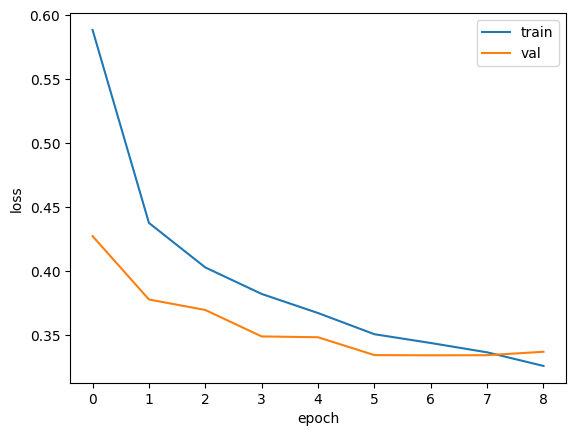

In [ ]:
plt.plot(history_10.history['loss'])
plt.plot(history_10.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [ ]:
model_10.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 2ms/step - loss: 0.3339 - accuracy: 0.8777


[0.33389222621917725, 0.8776666522026062]